<a href="https://colab.research.google.com/github/MuhammadAli-1106/loanApproval/blob/main/INFO_1998_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT INFO 1998
Members : rl896, ma2379, mo495, pl642

# Loan Approval Prediction using Machine Learning

## Introduction

This project aims to predict loan approvals using machine learning techniques. Loan approval is a critical process for financial institutions, and accurate prediction models can help automate and improve decision-making. By leveraging historical loan data, we can build models to assess the risk associated with loan applications and predict their likelihood of approval.

In this notebook, we will explore various machine learning algorithms, including Support Vector Machines (SVM), Random Forest, and k-Nearest Neighbors (kNN), to build a robust loan approval prediction model. We will follow a structured approach, starting with data preprocessing, feature selection, model training, and evaluation.

Our objective is to develop a model that can accurately classify loan applications as either approved or rejected, providing valuable insights for lenders and borrowers alike.


**Dataset:**

We will be using the "Loan Approval Classification Data" dataset from Kaggle. This dataset contains information about loan applicants, including their financial history, demographics, and loan details.


**Methodology:**

1. **Data Preprocessing:** We will clean and prepare the data, handling missing values and converting categorical features into numerical representations.
2. **Feature Selection:** We will identify the most relevant features for loan approval prediction using correlation analysis and feature importance techniques.
3. **Model Training:** We will train different machine learning models using the selected features and evaluate their performance.
4. **Model Evaluation:** We will assess the performance of the models using metrics such as accuracy, precision, and recall.
5. **Conclusion:** We will summarize our findings and discuss the implications of our results.

This project will demonstrate the application of machine learning in the financial domain and provide a foundation for building more sophisticated loan approval prediction systems.



Link to the database:
https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

Importing all relevant libraries for conveniency

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Loading in the dataset and checking the data with df.head

In [ ]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Separating different features into X(variables that are going to be used to make prediction) and y(target variable) and checking if X's 'loan_status' column has been dropped correctly to ensure to data leakeage when testing the model.

In [ ]:
X=df.drop(['loan_status'], axis=1)
y=df['loan_status']
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No


Handle categorical columns by using one hot coding to create dummies column for categorical data while dropping the first column to avoid repeating information.


In [ ]:
X_encoded = pd.get_dummies(df, drop_first=True)

Create a correlation heatmap to see the relation between the different columns to see how similar they are to help pick out top features that we are going to use to feed into the model.

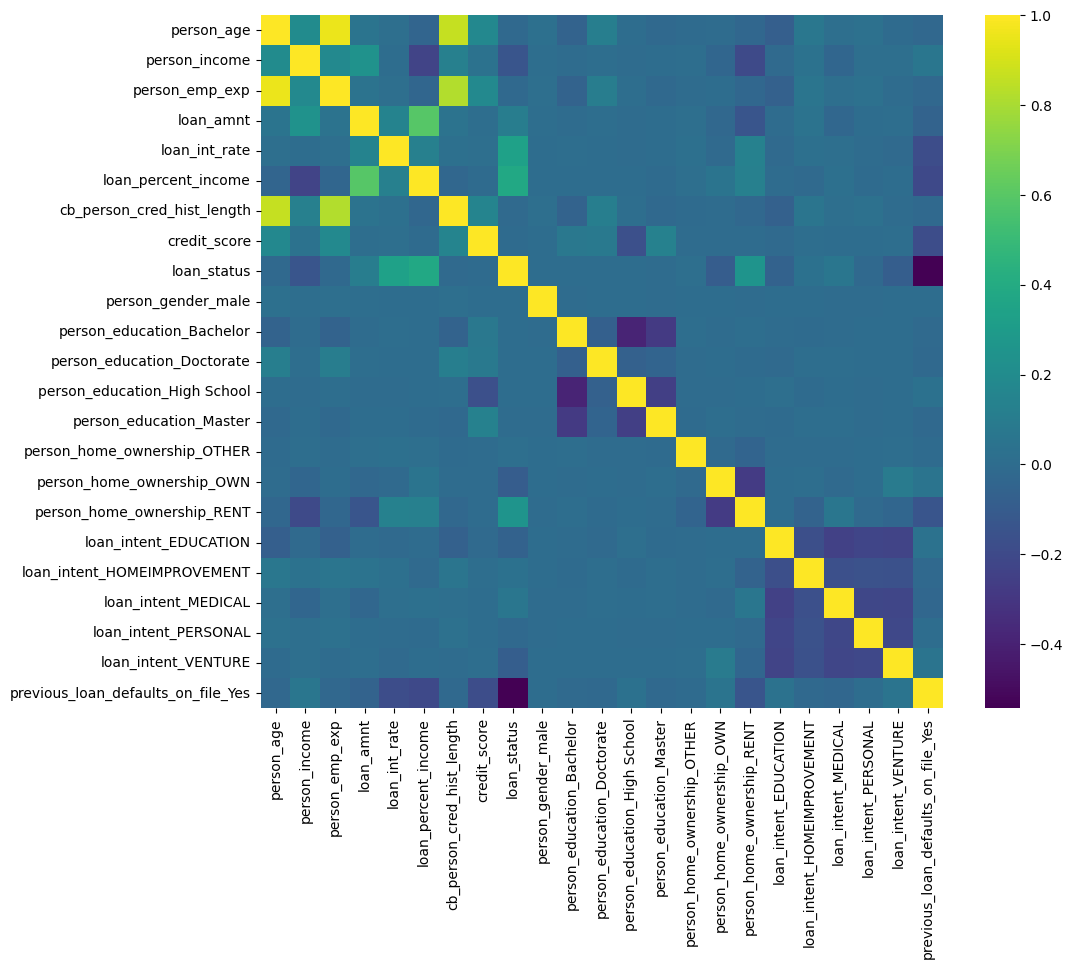

In [ ]:
plt.figure(figsize=(11, 9))
sns.heatmap(X_encoded.corr(), annot=False, cmap='viridis')
plt.show()

Focus down to only loan_status and rank the features to pick top 5 features to train the model. They are sorted into ascending order before being displayed, both as a table and as a bar plot (the x axis labels are rotated to make it more readable)

                                    Correlation with Loan Status
person_gender_male                                      0.000561
person_education_High School                            0.001277
person_education_Doctorate                              0.001833
person_education_Bachelor                               0.004728
person_education_Master                                 0.004741
credit_score                                            0.007647
person_home_ownership_OTHER                             0.013645
cb_person_cred_hist_length                              0.014851
person_emp_exp                                          0.020481
person_age                                              0.021476
loan_intent_PERSONAL                                    0.022488
loan_intent_HOMEIMPROVEMENT                             0.033838
loan_intent_EDUCATION                                   0.064006
loan_intent_MEDICAL                                     0.065195
loan_intent_VENTURE      

<ipython-input-57-2e16a4aefc14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y=correlation_df['Correlation with Loan Status'], palette='viridis')


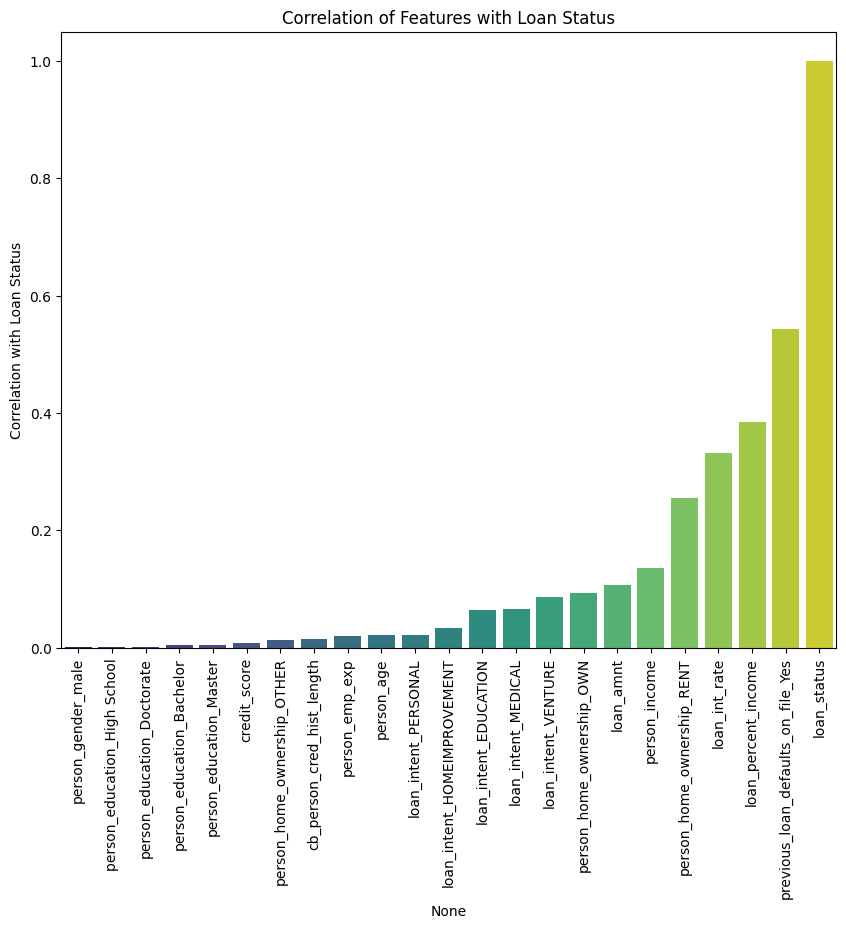

In [ ]:
correlation_with_target = X_encoded.corrwith(y)
correlation_df = pd.DataFrame(correlation_with_target.abs(), columns=['Correlation with Loan Status'])

correlation_df = correlation_df.sort_values(by='Correlation with Loan Status', ascending=True)

print(correlation_df)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_df.index, y=correlation_df['Correlation with Loan Status'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation of Features with Loan Status')
plt.show()

Printing some of the values to see if it was cut properly.

In [ ]:
X_encoded.head()

,previous_loan_defaults_on_file_Yes,loan_percent_income,loan_int_rate,person_home_ownership_RENT,person_income
0,False,0.49,16.02,True,71948.0
1,True,0.08,11.14,False,12282.0
2,False,0.44,12.87,False,12438.0
3,False,0.44,15.23,True,79753.0
4,False,0.53,14.27,True,66135.0


Only use the features listed down below since they possess the highest correlation values and to reduce the complexities of the code (also reduce run time). Only 1% of the database is used for training.

In [ ]:
X_encoded = X_encoded[['previous_loan_defaults_on_file_Yes', 'loan_percent_income', 'loan_int_rate', 'person_home_ownership_RENT', 'person_income']]
X_encoded_sampled = X_encoded.sample(frac=0.01, random_state=1998)
y_sampled = y[X_encoded_sampled.index]


Write a function to wrap fitting the model and returning the accuracy of the model

In [ ]:
def svm_model(X_data,y_data):

  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=1998)
  # Initialize and train the SVM classifier
  svm_classifier = SVC(kernel='linear')  # You can change the kernel if needed (e.g., 'rbf', 'poly')
  svm_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  svm_test_predictions = svm_classifier.predict(X_test)
  svm_train_predictions = svm_classifier.predict(X_train)

  # Evaluate the model
  svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
  svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
  return [svm_classifier, f"SVM Testing Accuracy: {svm_test_accuracy}",f"SVM Training Accuracy: {svm_train_accuracy}"]

svm_result = svm_model(X_encoded_sampled, y_sampled)
svm_classifier = svm_result[0]
svm_test_accuracy = svm_result[1]
svm_train_accuracy = svm_result[2]

print(svm_test_accuracy)
print(svm_train_accuracy)

SVM Testing Accuracy: 0.8187919463087249
SVM Training Accuracy: 0.8106312292358804


Since we are dealing with data which are both between 0 and 1 or large scale data like personal income which are in the ten thousands. We can improve the model by normalizing the data in each features. This is because SVM try to maximize the margin between the data, the features with greater values will have a higher impact on the decision making of this process.

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for normalization

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_encoded_scaled = scaler.fit_transform(X_encoded_sampled)

# Convert the scaled data back into a DataFrame (optional but recommended)
X_encoded_scaled = pd.DataFrame(X_encoded_scaled,columns=X_encoded.columns)

# Continue with sampling, splitting, and model training
result = svm_model(X_encoded_scaled, y_sampled)

print(result[1])
print(result[2])

SVM Testing Accuracy: 0.912751677852349
SVM Training Accuracy: 0.9269102990033222


Making a pair plot with loan statues as hue, blue representing rejected and orange representing accepted. It shows the relation between two variables and the target variable.

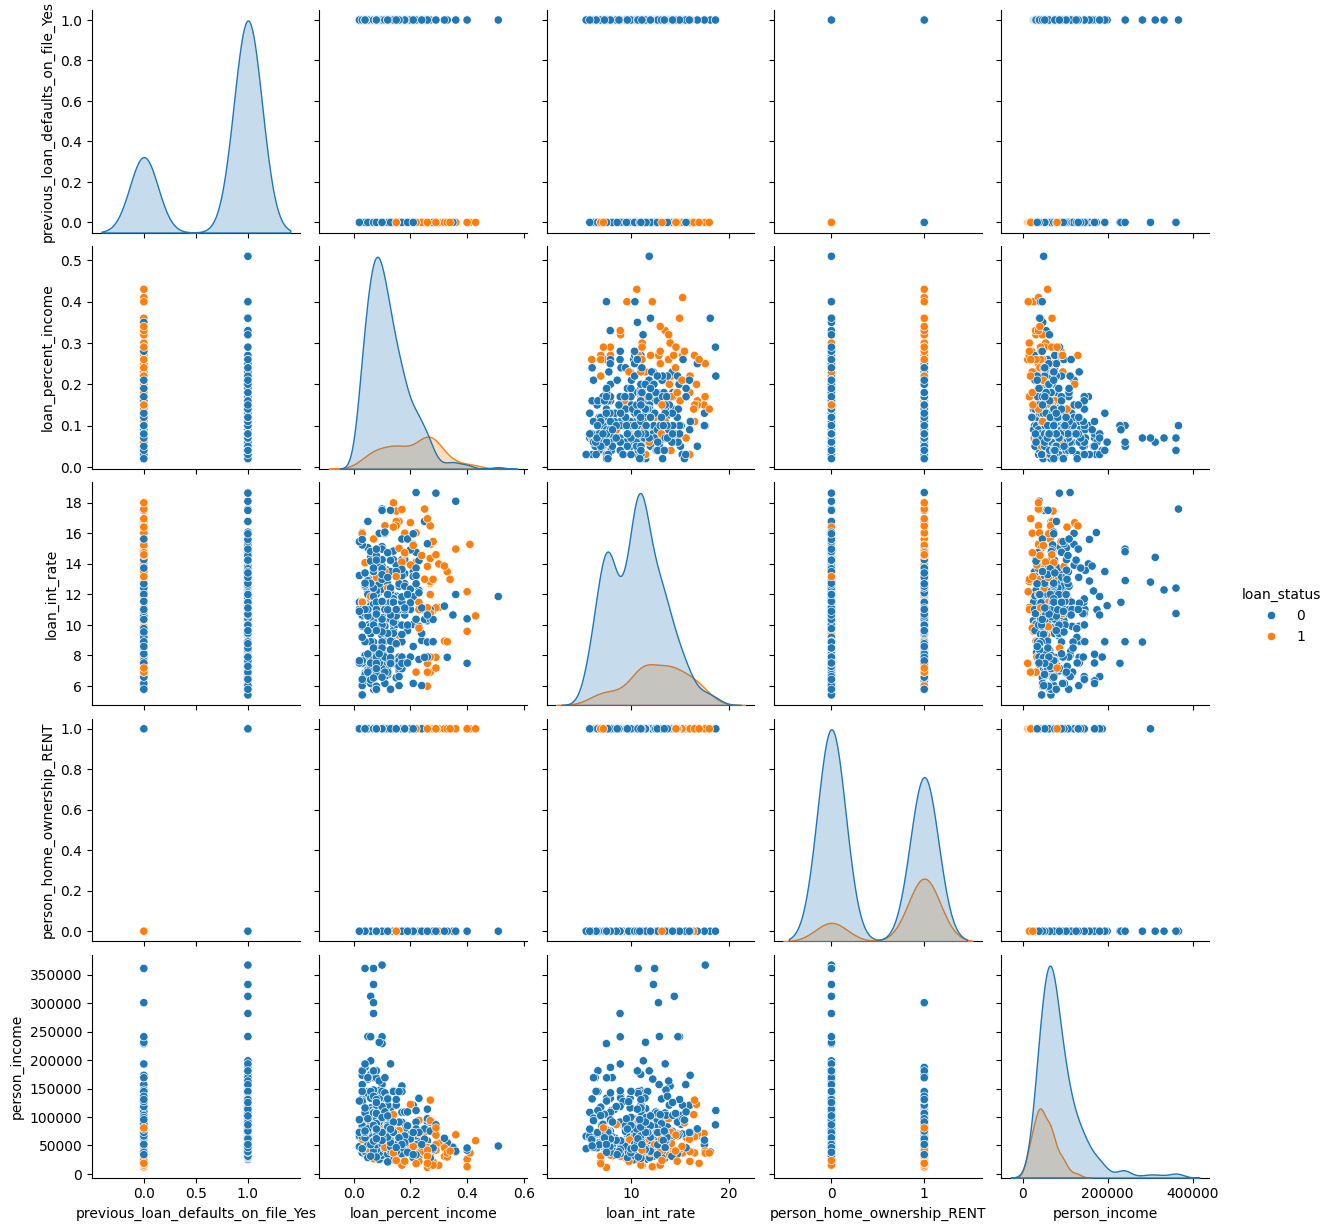

In [ ]:
df_plot = X_encoded_sampled.copy()
df_plot['loan_status'] = y_sampled

sns.pairplot(df_plot, hue='loan_status')
plt.show()

In [ ]:
# A function for accuracy of the RandomForestClassifier model
def RandomForestClassifier_model_accuracy(X_data,y_data):
  # Splitting the data
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=1998)

  # Creating a RandomForestClassifier model
  rfc = RandomForestClassifier(n_estimators = 100)
  # Fitting the data
  rfc.fit(X_train, y_train)

  # Prediction on the test set
  predictions_test = rfc.predict(X_test)
  predictions_train = rfc.predict(X_train)
  # Calculating the accuracy score
  accuracy_test = accuracy_score(y_test, predictions_test)
  accuracy_train = accuracy_score(y_train, predictions_train)
  return [rfc, f"Random Forest Testing Accuracy: {accuracy_test}",f"Random Forest Training Accuracy: {accuracy_train}"]

randomforestaccuracy=RandomForestClassifier_model_accuracy(X_encoded_sampled, y_sampled)[1]
print(randomforestaccuracy)
print(RandomForestClassifier_model_accuracy(X_encoded_sampled, y_sampled)[2])

Random Forest Testing Accuracy: 0.9261744966442953
Random Forest Training Accuracy: 1.0


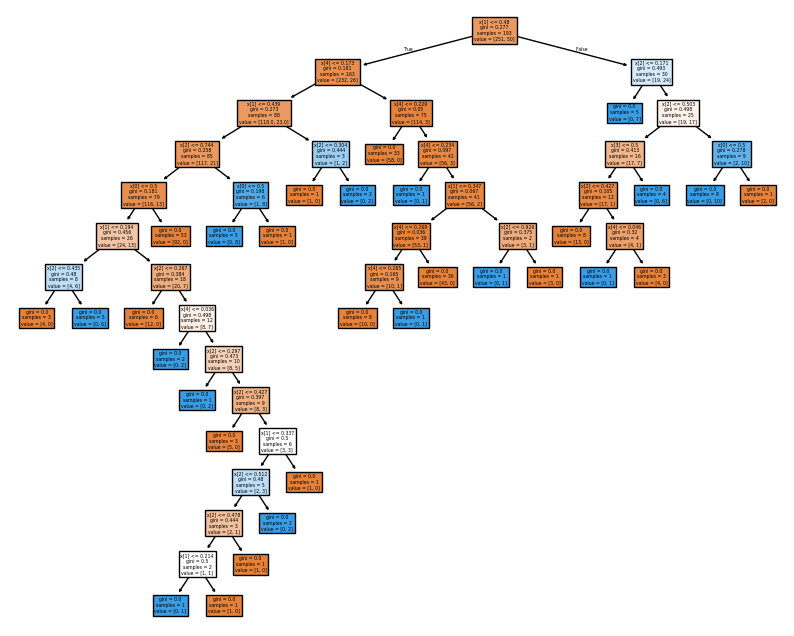

In [ ]:
# In this code block, we will plot the decision trees of the RandomForestClassifier

# This is the model along with its accuracy scores
RandomForestClassifier_result = RandomForestClassifier_model_accuracy(X_encoded_scaled, y_sampled)

# Taking the first tree of the Random Forest
first_tree = RandomForestClassifier_result[0].estimators_[0]

# Plotting the first tree
plt.figure(figsize = (10, 8))
plot_tree(first_tree, filled = True)
plt.show()

In [ ]:
# There are 100 trees in the Random Forest since that is the value of n_estimators
print(len(RandomForestClassifier_result[0].estimators_))

100


Using the code above, we can plot the decision trees for all the trees in the Random Forest. To do that, we would need to loop over 100 times(i in range(100)).

In [ ]:
# In this block of code, we will use a kNN

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y_sampled, test_size=0.3, random_state=1998)

# Creating a kNN model
# We are using n_neighbors = 2 since we need a binary classification(Loan Approved/Not Approved)
knn = KNeighborsClassifier(n_neighbors = 2)

# Fitting the data
knn.fit(X_train, y_train)

# Predicting
knn_test_pred = knn.predict(X_test)
knn_train_pred = knn.predict(X_train)

print((f"kNN Testing Accuracy: {accuracy_score(y_test, knn_test_pred)}"))
print((f"kNN Training Accuracy: {accuracy_score(y_train, knn_train_pred)}"))

kNN Testing Accuracy: 0.9333333333333333
kNN Training Accuracy: 0.9555555555555556


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

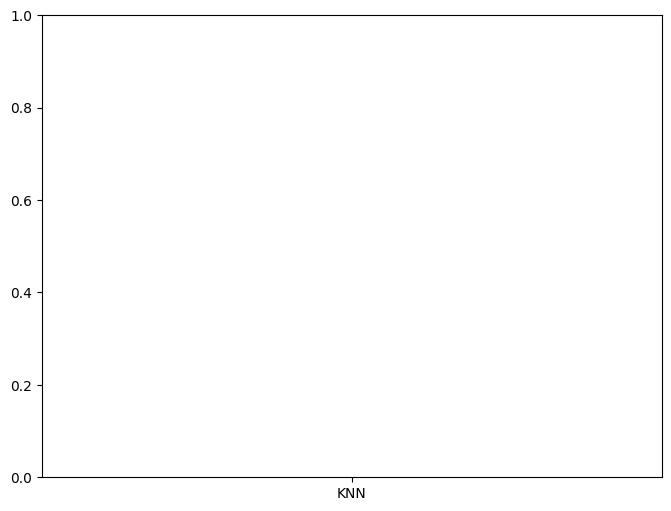

In [ ]:
svm_accuracy = float(result[1].split(': ')[1])  # Extract accuracy value as float
randomforestaccuracy = float(RandomForestClassifier_model_accuracy(X_encoded_sampled, y_sampled)[1].split(': ')[1]) # Extract accuracy value as float

knn_test_accuracy = accuracy_score(y_test, knn_test_pred)  # Calculate accuracy score directly

models = ['KNN', 'SVM', 'Random Forest']
accuracies = [knn_test_accuracy, svm_accuracy, randomforestaccuracy]  # Use accuracy scores for all models

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Model Comparison: Test Accuracies")
plt.ylim(0, 1)
plt.show()

## **Conclusion**

Conclusion
In this notebook, we explored the loan prediction problem using a range of machine learning models and focused especially on Support Vector Machines (SVM), Random Forest, and k-Nearest Neighbors (kNN). We commenced with the loading and preprocessing of the loan dataset, which included categorical variables and feature scaling.
SVM and RandomForestClassifier were able to achieve high accuracy on the sampled data given to them.
The features "previous_loan_defaults_on_file", "loan_percent_income", "loan_int_rate", "person_home_ownership", and "person_income" had the highest correlation with loan status and were thus selected for model training.
Scaling of data using MinMaxScaler resulted in a slight improvement in the performance of the SVM classifier.
Cross-validation was used to ensure generalizability of the model, showing consistent accuracy across different folds.
k-Nearest Neighbors can be used to make an accurate prediction. It achieved 95% accuracy on training data.
We used a small percentage of the database 1% of the original data set because of resource constraints to train the models to make it faster while running. Using a larger percentage would increase the accuracy.